In [1]:
#package imports
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time.core import Time, TimeDelta
from astropy.table import Table, vstack, hstack
import astropy.units as u
import numpy as np

In [8]:
#read file and convert time array to astropy time format
#hdulist = fits.open('/Users/hannahcollier/Documents/solo/data/Oct_28_21_SEP_L1/solo_L1A_stix-sci-xray-l1-2110280138_20211028T145959-20211028T200001_028826_V01.fits')
hdulist = fits.open('../data/stix_sept_oct_21/solo_L1A_stix-sci-xray-l1-2110280138_20211028T145959-20211028T200001_028826_V01.fits')
header = hdulist[0].header
data = Table(hdulist[2].data)
energies = Table(hdulist[3].data)

data_time = Time(header['date_obs']) + TimeDelta(data['time'] * u.s)


In [9]:
#sum over all detectors and pixels (optional)
data_counts = np.sum(data['counts'],axis=(1,2))

#normalise by time_bin duration ("timedel" keyword)
data_counts_per_sec = data_counts/data['timedel'].reshape(-1,1)

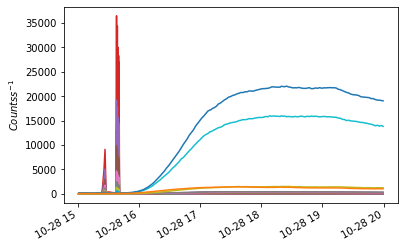

In [10]:
#Time profile
plt.plot_date(data_time.plot_date, data_counts_per_sec,'-')
plt.gcf().autofmt_xdate() 
plt.ylabel('$Countss^{-1}$')
#plt.yscale('log')
plt.show()

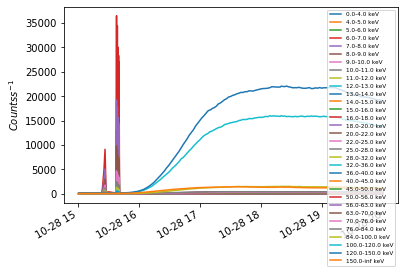

In [11]:
#to plot time profile for all energies with legend
for i in range(len(energies)):
    plt.plot_date(data_time.plot_date, data_counts_per_sec[:,i],'-', label=f'{energies[i]["e_low"]}-{energies[i]["e_high"]} keV')
plt.gcf().autofmt_xdate() 
plt.ylabel('$Countss^{-1}$')
#plt.yscale('log')
plt.legend(loc='upper right', fontsize='xx-small')
plt.show()

In [12]:
#subtract background 
#hdulist_bkg = fits.open('/Users/hannahcollier/Documents/solo/data/Oct_28_21_SEP_L1/bkg_solo_L1A_stix-sci-xray-l1-2110250047_20211025T080018-20211025T094018_017218_V01.fits')
hdulist_bkg = fits.open('../data/stix_sept_oct_21/solo_L1A_stix-sci-xray-l1-2110250047_20211025T080018-20211025T094018_017218_V01.fits')

data_bkg = Table(hdulist_bkg[2].data)
bkg_counts = np.reshape(np.sum(data_bkg['counts'],axis=(1,2))/data_bkg['timedel'],(32)) #sum over detectors & pixels and normalise by time bin duration
bkg_arr = []
for i in range(len(data)):
    bkg_arr.append(bkg_counts)
    
data_counts_per_sec_nobkg = data_counts_per_sec - bkg_arr 

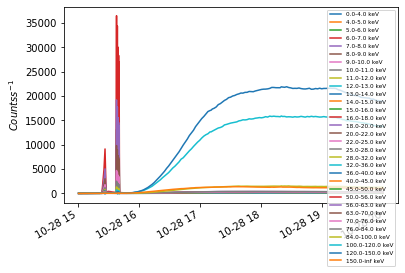

In [13]:
#background subtracted time series
for i in range(len(energies)):
    plt.plot_date(data_time.plot_date, data_counts_per_sec_nobkg[:,i],'-', label=f'{energies[i]["e_low"]}-{energies[i]["e_high"]} keV')
plt.gcf().autofmt_xdate() 
plt.ylabel('$Countss^{-1}$')
#plt.yscale('log')
plt.legend(loc='upper right', fontsize='xx-small')
plt.show()

In [14]:
#to stack multiple files for a longer duration time profile

hdulist2 = fits.open('/Users/hannahcollier/Documents/solo/data/Oct_28_21_SEP_L1/solo_L1A_stix-sci-xray-l1-2110280139_20211028T200001-20211029T005959_028827_V01.fits')
data2 = Table(hdulist2[2].data)

hdulist3 = fits.open('/Users/hannahcollier/Documents/solo/data/Oct_28_21_SEP_L1/solo_L1A_stix-sci-xray-l1-2110290010_20211029T005959-20211029T060003_028828_V01.fits')
data3 = Table(hdulist3[2].data)

data2['time'] = data2['time']+data['time'][-1] 
data3['time'] = data3['time']+data2['time'][-1]

data_stacked = vstack([data,data2,data3],join_type = 'outer')
data_time_stacked = Time(header['date_obs']) + TimeDelta(data_stacked['time'] * u.s)

data_stacked_counts = np.sum(data_stacked['counts'],axis=(1,2)) #sum over pixels & detectors
data_stacked_counts_per_sec = data_stacked_counts/data_stacked['timedel'].reshape(-1,1)
bkg_stacked_arr = []
for i in range(len(data_stacked)):
    bkg_stacked_arr.append(bkg_counts)

data_stacked_counts_per_sec_nobkg = data_stacked_counts_per_sec - bkg_stacked_arr

plt.plot_date(data_time_stacked.plot_date, data_stacked_counts_per_sec_nobkg, '-')
plt.gcf().autofmt_xdate() 
plt.ylabel('$Countss^{-1}$')
#plt.yscale('log')
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/Users/hannahcollier/Documents/solo/data/Oct_28_21_SEP_L1/solo_L1A_stix-sci-xray-l1-2110280139_20211028T200001-20211029T005959_028827_V01.fits'